<font color=red size=3> 模块一、导入数据并清洗 </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline



large = 22; med = 16; small = 12

params = {'axes.titlesize': large,

          'legend.fontsize': med,

          'figure.figsize': (12, 8),

          'axes.labelsize': med,

          'axes.titlesize': med,

          'xtick.labelsize': med,

          'ytick.labelsize': med,

          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [4]:
data=pd.read_csv('d:data/cumstomer_test.csv')
data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,orderid,userid,order_date,order_amount
0,2018TYF044,F007,2017/7/26,101.954545
1,2018TYF043,F002,2017/7/25,122.545455
2,2018TY1C274,C019,2017/8/22,83.981818
3,2018TYF042,F006,2017/7/24,40.198864
4,2018TYF041,W027NP,2017/7/19,11.147727


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 4 columns):
orderid         6134 non-null object
userid          6134 non-null object
order_date      6134 non-null object
order_amount    6134 non-null float64
dtypes: float64(1), object(3)
memory usage: 191.8+ KB


In [6]:
data['order_date']=pd.to_datetime(data.order_date)
data['month']=data.order_date.values.astype('datetime64[M]')
data.head()

,orderid,userid,order_date,order_amount,month
0,2018TYF044,F007,2017-07-26,101.954545,2017-07-01
1,2018TYF043,F002,2017-07-25,122.545455,2017-07-01
2,2018TY1C274,C019,2017-08-22,83.981818,2017-08-01
3,2018TYF042,F006,2017-07-24,40.198864,2017-07-01
4,2018TYF041,W027NP,2017-07-19,11.147727,2017-07-01


In [7]:
#查看缺失值

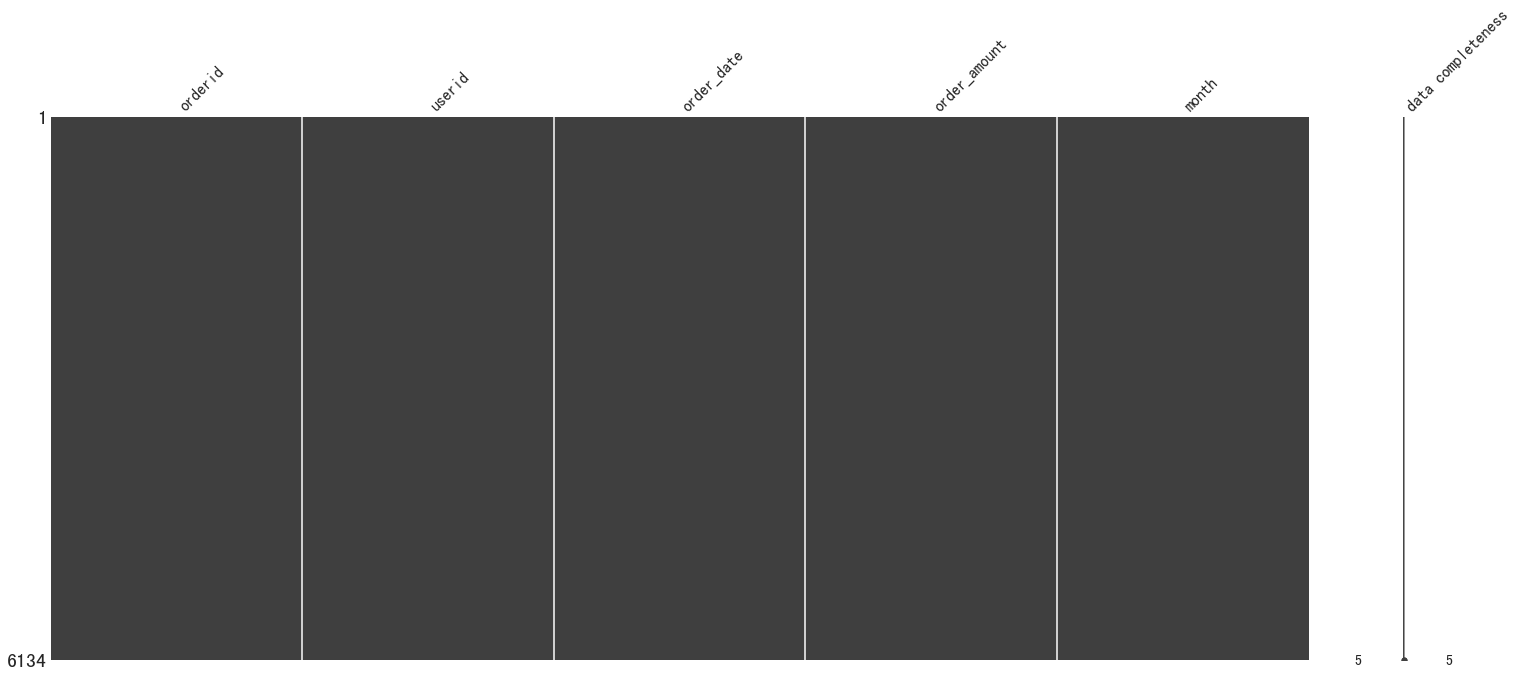

In [8]:
import missingno as msno
msno.matrix(data, labels=True)
# msno.heatmap(data)
#msno.dendrogram(data)

<font color=red size=3> 模块二、 数据分布分析/统计分析/对比分析 </font>

<font color=red size=3> 2.1、 总体概览 </font>

In [9]:
#1、分析时间

In [10]:
print(data.order_date.min())
print(data.order_date.max())

2017-01-02 00:00:00
2017-12-31 00:00:00


In [11]:
#2、订单总数

In [12]:
data.orderid.count()

6134

In [13]:
#无效订单

In [14]:
data['orderid'][data['order_amount']==0].count()

222

In [15]:
data=data[data['order_amount']>0]

In [16]:
#3/  2017年订单总金额

In [17]:
data['order_amount'].sum()

1362082.6347727273

In [18]:
#4  2017年客户数量

In [19]:
#客户数量
data.userid.drop_duplicates().count()

624

<font color=red size=3> 2.2、 订单模块 </font>

<font color=red size=3> 2.2.1、 订单的金额分布 </font>

In [20]:
data.order_amount=data.order_amount.astype('int')

In [21]:
data.order_amount.describe().astype('int')

count     5912
mean       229
std        661
min          0
25%         46
50%        137
75%        246
max      27625
Name: order_amount, dtype: int32

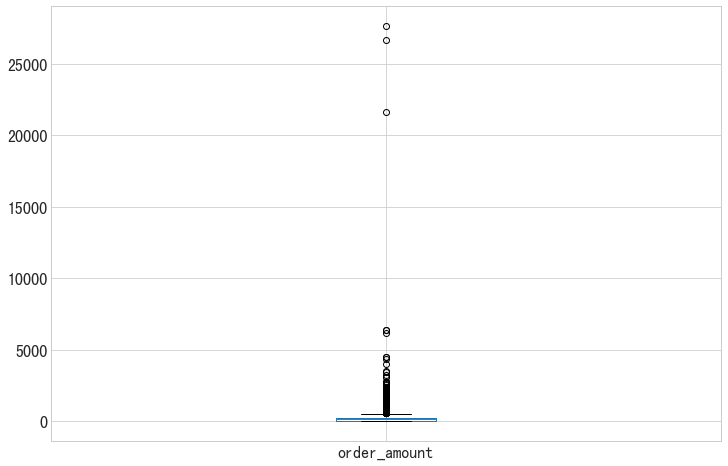

In [22]:
data.order_amount.plot.box()

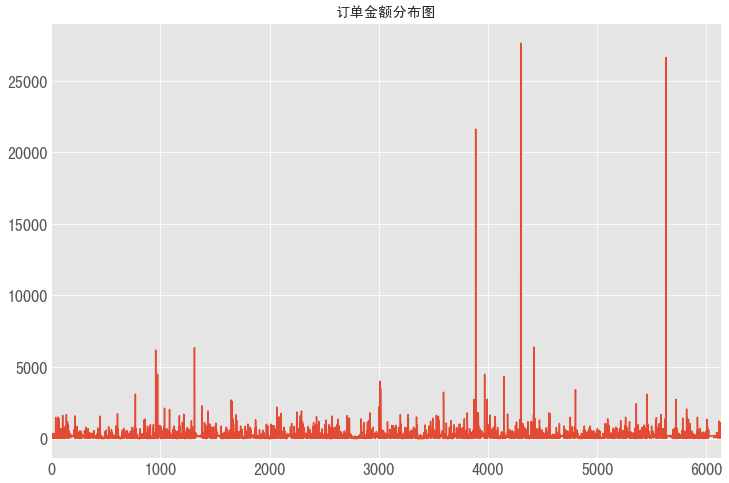

In [23]:
plt.style.use('ggplot')
data.order_amount.plot(figsize=(12,8),title = '订单金额分布图')

<font color=red size=3> 2.2.2、 订单的时间分布 </font>

In [24]:
grouped_month=data.groupby('month')

In [25]:
order_month_grouped=grouped_month.orderid.count()

In [26]:
order_month_grouped=pd.DataFrame(order_month_grouped)
order_month_grouped

,orderid
month,
2017-01-01,334
2017-02-01,421
2017-03-01,379
2017-04-01,424
2017-05-01,571
2017-06-01,579
2017-07-01,553
2017-08-01,540
2017-09-01,490


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

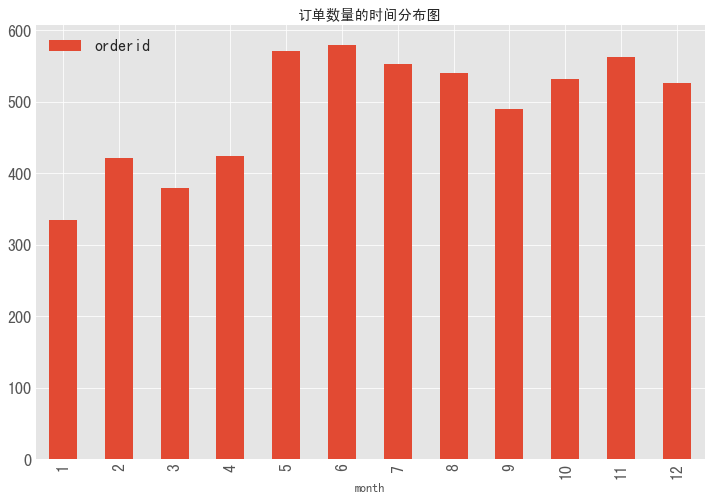

In [27]:
fig=order_month_grouped.plot.bar(figsize=(12,8),title = '订单数量的时间分布图')
fig.set_xticklabels(range(1,13))

<font color=red size=3> 2.3、 金额模块 </font>

<font color=red size=3>   金额的时间分布 </font>

In [28]:
grouped_month=data.groupby('month')
amount_month_grouped=grouped_month.order_amount.sum()
amount_month_grouped.head()

month
2017-01-01     73263
2017-02-01    121257
2017-03-01     81342
2017-04-01     79983
2017-05-01    164122
Name: order_amount, dtype: int32

In [29]:
amount_month_grouped=pd.DataFrame(amount_month_grouped)
amount_month_grouped

,order_amount
month,
2017-01-01,73263
2017-02-01,121257
2017-03-01,81342
2017-04-01,79983
2017-05-01,164122
2017-06-01,157265
2017-07-01,113144
2017-08-01,128849
2017-09-01,88044


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

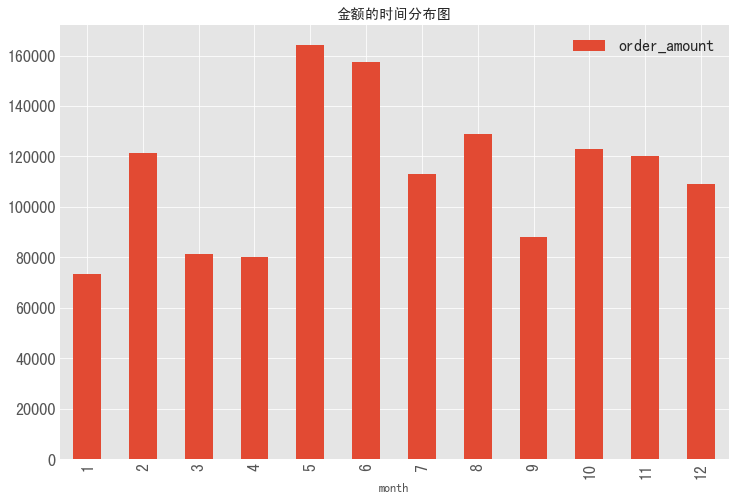

In [30]:
fig=amount_month_grouped.plot.bar(figsize=(12,8),title = '金额的时间分布图')
fig.set_xticklabels(range(1,13))

<font color=red size=3> 2.4  客户模块 </font>

<font color=red size=3> 2.4.1  客户总数 </font>

In [31]:
#客户数量
data.userid.drop_duplicates().count()

624

<font color=red size=3> 2.4.2  客户的时间分布 </font>

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

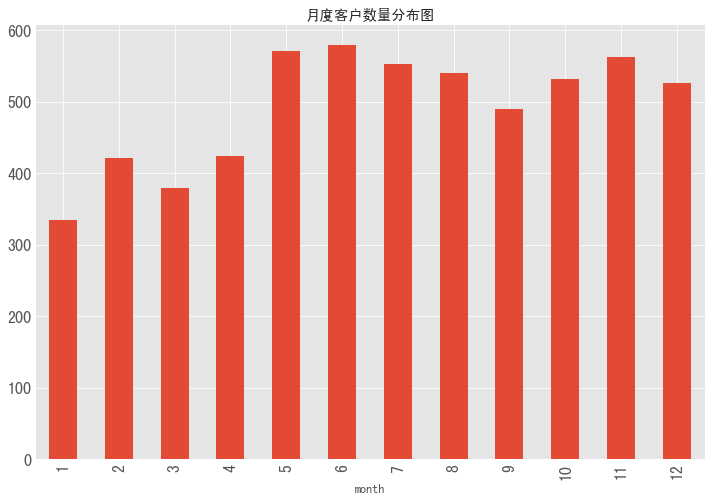

In [32]:
#时间段上客户的数量分布
fig=grouped_month.orderid.apply(lambda x:len(x.drop_duplicates())).plot.bar(title = '月度客户数量分布图')
fig.set_xticklabels(range(1,13))

<font color=red size=3> 2.4.2  客户的订单分布 </font>

In [33]:
user_order_count=data.groupby('userid').count()
user_order_count.head()

,orderid,order_date,order_amount,month
userid,,,,
000,1,1,1,1
008,23,23,23,23
088,79,79,79,79
A-1000,18,18,18,18
A-3091,4,4,4,4


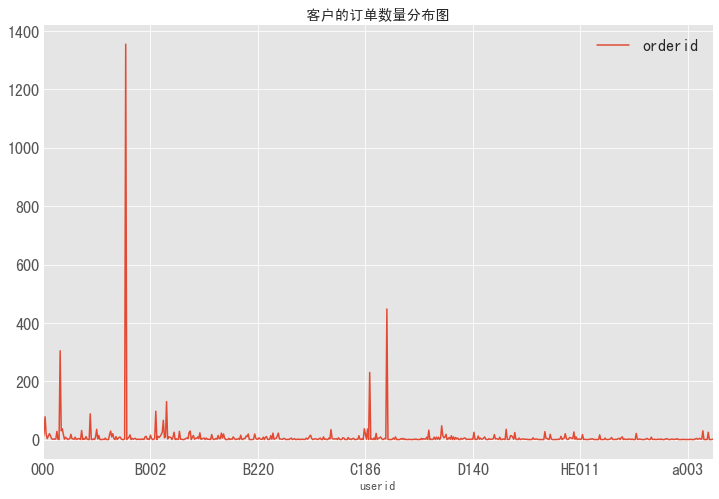

In [34]:
user_order_count[['orderid']].plot(title = '客户的订单数量分布图')

<font color=red size=3>   客户的消费时间间隔 </font>

In [35]:
order_time_gap=data[['userid','order_date']].sort_values('order_date').groupby(['userid']).apply(lambda x:x-x.shift(1))

In [36]:
order_time_gap.order_date=order_time_gap.order_date/np.timedelta64(1,'D')

In [37]:
order_time_gap[order_time_gap['order_date']>3].describe()

,order_date
count,1898.000000
mean,41.099579
std,47.150653
min,4.000000
25%,11.000000
50%,24.000000
75%,52.000000
max,318.000000


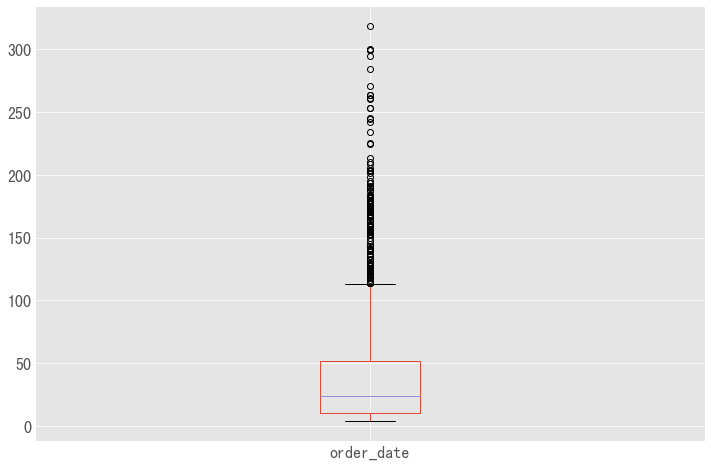

In [38]:
order_time_gap[order_time_gap['order_date']>3].plot.box()

<font color=red size=3> 2.4.3  客户的金额分布 </font>

In [39]:
#客户大小

In [40]:
user_amount=data.groupby('userid').sum()

In [41]:
user_amount['order_amount']=user_amount['order_amount'].astype('int')

In [42]:
user_amount.head()

,order_amount
userid,
000,15
008,2113
088,26094
A-1000,3716
A-3091,3451


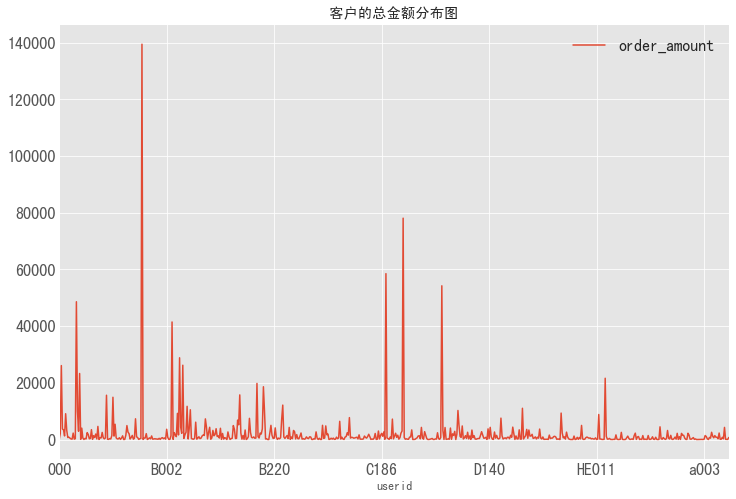

In [43]:
user_amount.plot(title = '客户的总金额分布图')

<font color=red size=3> 2.4.4  大小客户初步分析 </font>

In [44]:
user_amount.sort_values('order_amount',ascending=False,inplace=True)

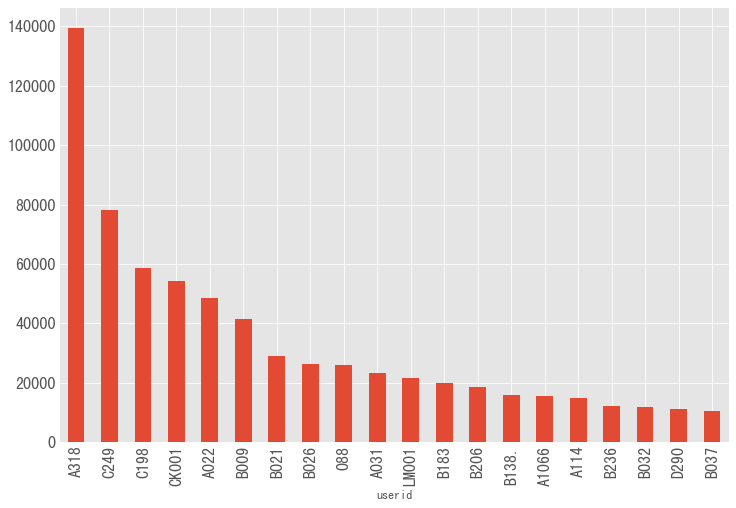

In [45]:
user_amount['order_amount'].head(20).plot.bar()

In [46]:
user_amount['cumsum']=user_amount['order_amount'].cumsum()

In [50]:
user_amount_cumsum=user_amount['cumsum'].apply(lambda x:x/1362082)

In [51]:
user_amount_cumsum=pd.DataFrame(user_amount_cumsum).reset_index()

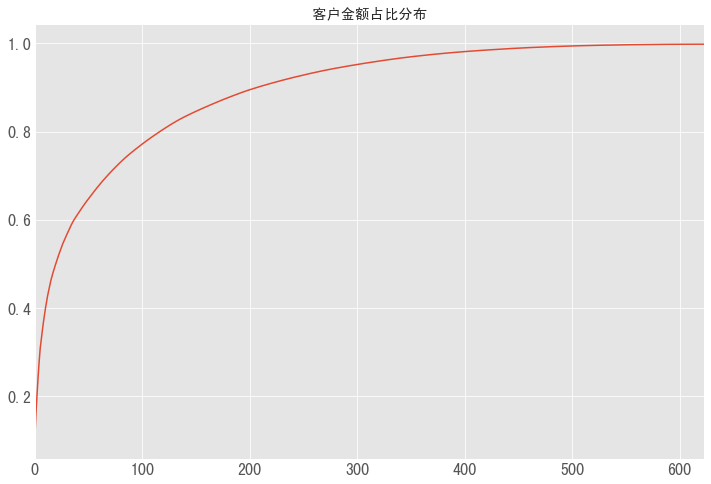

In [52]:
user_amount_cumsum['cumsum'].plot(title='客户金额占比分布')

In [53]:
user_amount.describe()

,order_amount,cumsum
count,624.000000,6.240000e+02
mean,2178.173077,1.214831e+06
std,8080.879702,2.023768e+05
min,0.000000,1.394970e+05
25%,146.750000,1.160802e+06
50%,511.000000,1.302696e+06
75%,1482.750000,1.349750e+06
max,139497.000000,1.359180e+06


In [54]:
user_amount['cut']=pd.DataFrame(pd.cut(user_amount.order_amount,[0,150,500,1500,10000,139497])).order_amount

In [55]:
user_amount_cut=user_amount.reset_index().groupby('cut').count()[['userid']]

In [56]:
user_amount_cut

,userid
cut,
"(0, 150]",157
"(150, 500]",146
"(500, 1500]",167
"(1500, 10000]",131
"(10000, 139497]",22


In [ ]:
user_amount_cut2=user_amount.reset_index().groupby('cut').sum()[['order_amount']]

Text(0.5, 1.0, '各个区间客户的贡献金额')

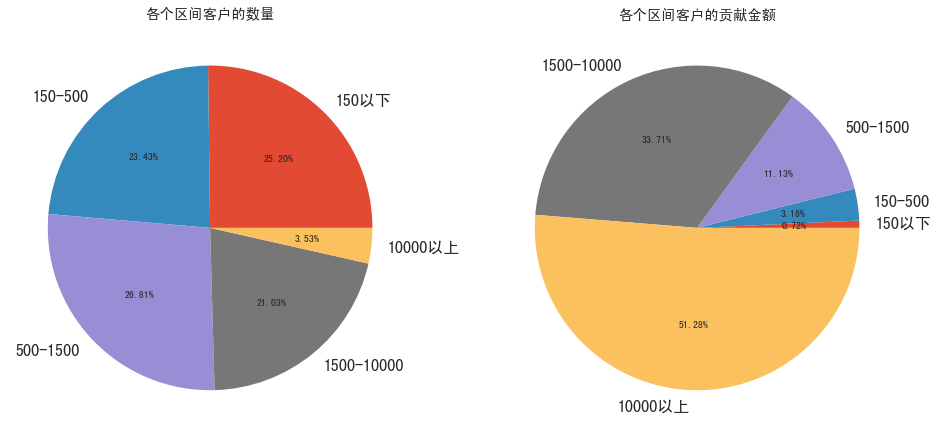

In [83]:
fig,axes=plt.subplots(1,2,figsize=(16,10))
#plt.axis('equal')  # 保证长宽相等
axes[0].pie(user_amount_cut.userid,labels=['150以下','150-500','500-1500','1500-10000','10000以上'],autopct='%.2f%%')
axes[0].set_title('各个区间客户的数量')

#fig,ax2=plt.subplots(1,2,figsize=(8,6))
#plt.axis('equal')  # 保证长宽相等
axes[1].pie(user_amount_cut2.order_amount,labels=['150以下','150-500','500-1500','1500-10000','10000以上'],autopct='%.2f%%')
axes[1].set_title('各个区间客户的贡献金额')

<font color=red size=3> 2.4.5  新时间段的客户数据导入与各项指标的对比 </font>

In [114]:
data02=pd.read_csv('d:data/cumstomer_test2.csv')
data02.drop(columns=['Unnamed: 0'],inplace=True)
data02.head()

,orderid,userid,order_date,order_amount,month
0,2017TYB00001,B279,2016-10-12,65.383523,2016-10-01
1,2017TYA1079,A-1000,2016-07-13,217.685909,2016-07-01
2,2016TYA111111,A318,2016-05-18,0.000000,2016-05-01
3,139-1,B168,2016-02-27,0.000000,2016-02-01
4,2016TYW006,W026,2016-01-08,772.224091,2016-01-01


In [115]:
data02['order_date']=pd.to_datetime(data02.order_date)
data02['month']=data02.order_date.values.astype('datetime64[M]')
data02.head()

,orderid,userid,order_date,order_amount,month
0,2017TYB00001,B279,2016-10-12,65.383523,2016-10-01
1,2017TYA1079,A-1000,2016-07-13,217.685909,2016-07-01
2,2016TYA111111,A318,2016-05-18,0.000000,2016-05-01
3,139-1,B168,2016-02-27,0.000000,2016-02-01
4,2016TYW006,W026,2016-01-08,772.224091,2016-01-01


<font color=red size=3> 总金额对比 </font>

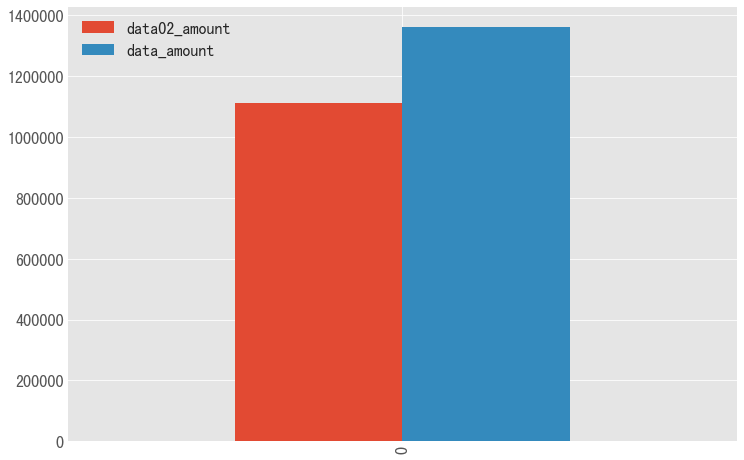

In [119]:
plt.style.use('ggplot')
pd.DataFrame({'data02_amount':data02.order_amount.sum(),'data_amount':data.order_amount.sum()},index=[0]).plot.bar()

<font color=red size=3> 月度金额增长率 </font>

In [111]:
data_amount_month=data[['month','order_amount']].groupby('month').sum().reset_index()
data_amount_month.month=data_amount_month.month.dt.month

In [117]:
data02_amount_month=data02[['month','order_amount']].groupby('month').sum().reset_index()
data02_amount_month.month=data02_amount_month.month.dt.month

In [131]:
amount_month_contrast=pd.merge(data02_amount_month,data_amount_month,on='month')
amount_month_contrast['rate']=(amount_month_contrast.order_amount_y-amount_month_contrast.order_amount_x)/amount_month_contrast.order_amount_x

In [134]:
amount_month_contrast.set_index('month').T

month,1,2,3,4,5,6,7,8,9,10,11,12
order_amount_x,57608.160795,61899.437727,80948.891250,95507.235682,131258.473523,108125.765568,79007.533864,96063.204659,90267.150341,92884.688295,121711.340795,95601.217273
order_amount_y,73418.925909,121455.701705,81521.313182,80189.998864,164395.163750,157544.668068,113408.712841,129123.067955,88290.293864,123073.195227,120391.474205,109270.119205
rate,0.274454,0.962145,0.007071,-0.160378,0.252454,0.457050,0.435416,0.344147,-0.021900,0.325011,-0.010844,0.142978


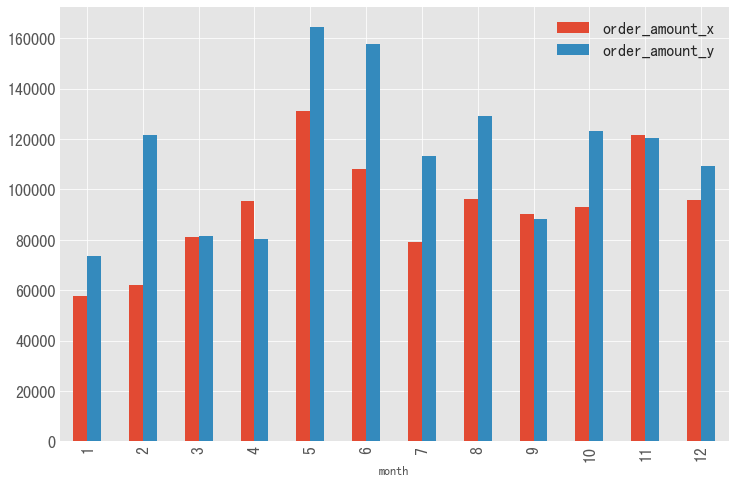

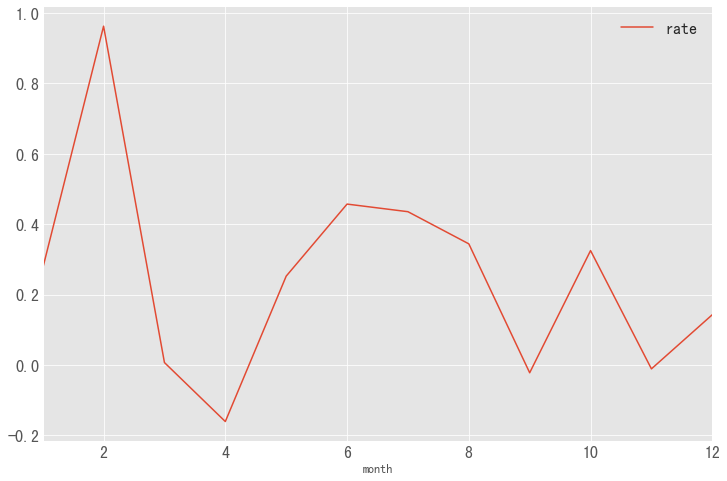

In [206]:
amount_month_contrast[['month','order_amount_x','order_amount_y']].set_index('month').plot.bar()
amount_month_contrast[['month','rate']].set_index('month').plot()

<font color=red size=3> 月度客户数量增长率 </font>

In [125]:
data_user_amount_month=data[['month','userid']].groupby('month').count().reset_index()
data_user_amount_month.month=data_user_amount_month.month.dt.month

data02_user_amount_month=data02[['month','userid']].groupby('month').count().reset_index()
data02_user_amount_month.month=data02_user_amount_month.month.dt.month

In [211]:
user_amount_contrast=pd.merge(data02_user_amount_month,data_user_amount_month,on='month')
user_amount_contrast['rate']=(user_amount_contrast['userid_y']-user_amount_contrast['userid_x'])/user_amount_contrast['userid_x']
user_amount_contrast.set_index('month').T

month,1,2,3,4,5,6,7,8,9,10,11,12
userid_x,260.000000,293.000000,331.000000,295.000000,443.000000,401.000000,366.000000,332.000000,406.000000,420.000000,495.000000,411.000000
userid_y,342.000000,473.000000,386.000000,432.000000,588.000000,605.000000,563.000000,548.000000,500.000000,583.000000,578.000000,536.000000
rate,0.315385,0.614334,0.166163,0.464407,0.327314,0.508728,0.538251,0.650602,0.231527,0.388095,0.167677,0.304136


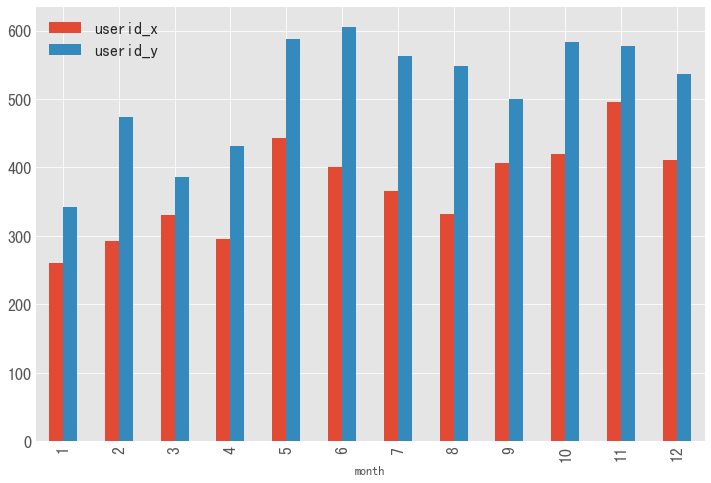

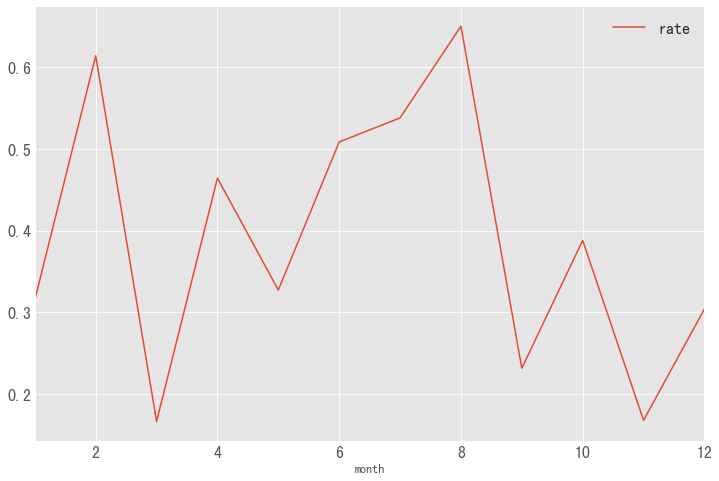

In [214]:
user_amount_contrast[['month','userid_x','userid_y']].set_index('month').plot.bar()
user_amount_contrast[['month','rate']].set_index('month').plot()

<font color=red size=3> 月度订单数量增长率 </font>

In [216]:
data_order_amount_month=data[['month','orderid']].groupby('month').count().reset_index()
data_order_amount_month.month=data_order_amount_month.month.dt.month

data02_order_amount_month=data02[['month','orderid']].groupby('month').count().reset_index()
data02_order_amount_month.month=data02_order_amount_month.month.dt.month

In [218]:
order_amount_contrast=pd.merge(data02_order_amount_month,data_order_amount_month,on='month')
order_amount_contrast['rate']=(order_amount_contrast['orderid_y']-order_amount_contrast['orderid_x'])/order_amount_contrast['orderid_x']
order_amount_contrast.set_index('month').T

month,1,2,3,4,5,6,7,8,9,10,11,12
orderid_x,260.000000,293.000000,331.000000,295.000000,443.000000,401.000000,366.000000,332.000000,406.000000,420.000000,495.000000,411.000000
orderid_y,342.000000,473.000000,386.000000,432.000000,588.000000,605.000000,563.000000,548.000000,500.000000,583.000000,578.000000,536.000000
rate,0.315385,0.614334,0.166163,0.464407,0.327314,0.508728,0.538251,0.650602,0.231527,0.388095,0.167677,0.304136


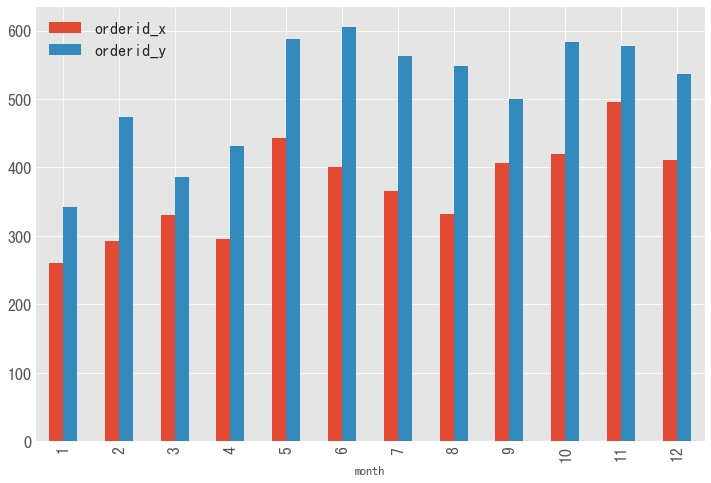

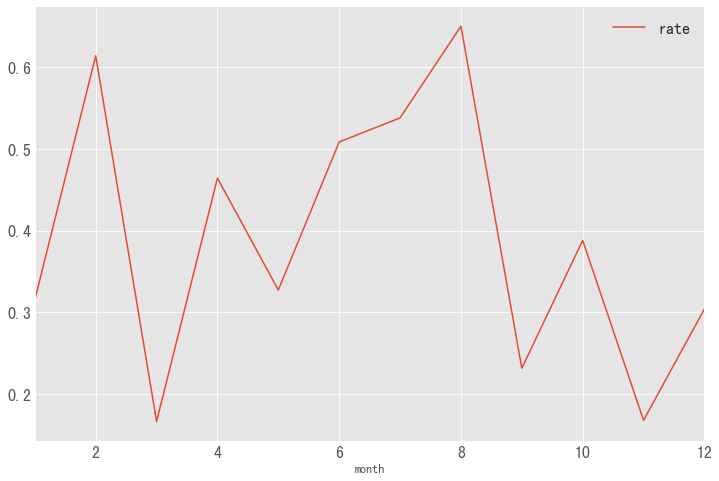

In [219]:
order_amount_contrast[['month','orderid_x','orderid_y']].set_index('month').plot.bar()
order_amount_contrast[['month','rate']].set_index('month').plot()

<font color=red size=3> 2.4.6  增长类客户分析 </font>

In [220]:
user_amount02=data02.groupby('userid').sum()
user_amount02.head()

,order_amount
userid,
00000,0.000000
008,1473.534545
088,22376.212273
A-1000,1411.618182
A001,2460.547045


In [221]:
user_amount=user_amount[['order_amount']]
user_amount.head()

,order_amount
userid,
A318,139497
C249,78108
C198,58535
CK001,54249
A022,48622


In [222]:
merge_inner=pd.merge(user_amount02,user_amount,on='userid',how='inner')
merge_inner.head()

,order_amount_x,order_amount_y
userid,,
008,1473.534545,2113
088,22376.212273,26094
A-1000,1411.618182,3716
A001,2460.547045,1268
A003,6637.723182,9111


In [223]:
merge_inner['amount_gap']=merge_inner['order_amount_y']-merge_inner['order_amount_x']
merge_inner.head()

,order_amount_x,order_amount_y,amount_gap
userid,,,
008,1473.534545,2113,639.465455
088,22376.212273,26094,3717.787727
A-1000,1411.618182,3716,2304.381818
A001,2460.547045,1268,-1192.547045
A003,6637.723182,9111,2473.276818


In [224]:
#增长类的客户数量
merge_inner[merge_inner[['amount_gap']]>0][['amount_gap']].dropna().count()

amount_gap    195
dtype: int64

In [225]:
#增长类的客户金额
print('%.2f'%merge_inner[merge_inner[['amount_gap']]>0][['amount_gap']].sum())

393572.70


In [226]:
user_incrased=merge_inner[merge_inner[['amount_gap']]>0][['amount_gap']].sort_values(by='amount_gap',ascending=False)
user_incrased.head()

,amount_gap
userid,
A318,62577.405114
C249,36203.628636
CK001,32182.636364
C198,20553.956250
B021,17633.715455


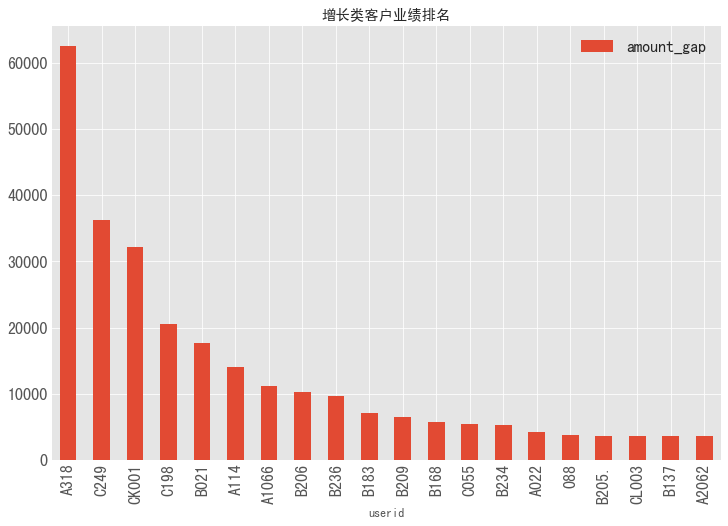

In [227]:
merge_inner[merge_inner[['amount_gap']]>0][['amount_gap']].sort_values(by='amount_gap',ascending=False).head(20).plot.bar(title = '增长类客户业绩排名')

In [228]:
user_incrased=user_incrased.dropna()

In [229]:
user_incrased_data=pd.merge(user_incrased,data[['userid','month','order_amount']],on='userid',how='left')
user_incrased_data.head()

,userid,amount_gap,month,order_amount
0,A318,62577.405114,2017-11-01,20.013409
1,A318,62577.405114,2017-12-01,2.074091
2,A318,62577.405114,2017-12-01,38.485909
3,A318,62577.405114,2017-12-01,2.074091
4,A318,62577.405114,2017-12-01,38.485909


In [230]:
user_incrased_data=user_incrased_data.groupby('month').sum()[['order_amount']].reset_index()

In [231]:
user_incrased_data2016=pd.merge(user_incrased,data2016[['userid','month','order_amount']],on='userid')

In [232]:
user_incrased_data2016.head()

,userid,amount_gap,month,order_amount
0,A318,62577.405114,2016-05-01,0.000000
1,A318,62577.405114,2016-12-01,574.715455
2,A318,62577.405114,2016-12-01,17.220000
3,A318,62577.405114,2016-12-01,107.015455
4,A318,62577.405114,2016-12-01,590.423864


In [233]:
user_incrased_data2016=user_incrased_data2016.groupby('month').sum()[['order_amount']].reset_index()

Text(0.5, 1.0, '增长类客户的消费走势图')

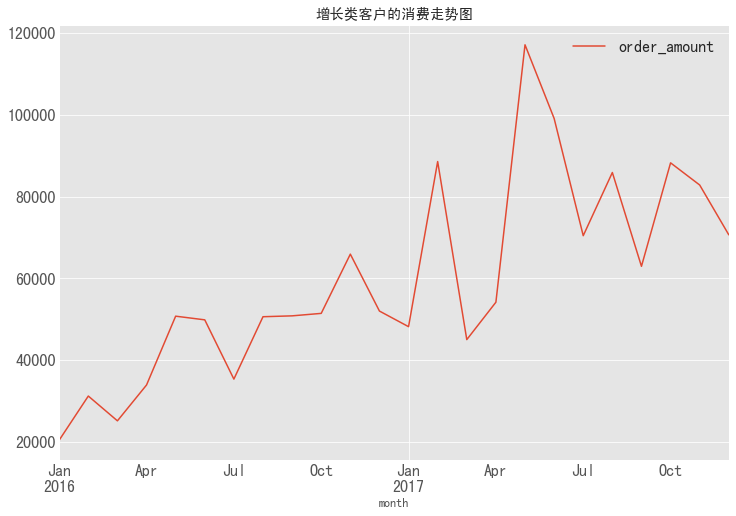

In [234]:
pd.concat([user_incrased_data2016,user_incrased_data], axis=0).groupby('month').sum().plot()
plt.title('增长类客户的消费走势图')

<font color=red size=3> 2.4.7  萎缩客户分析 </font>

In [235]:
#萎缩类的客户数量
merge_inner[merge_inner[['amount_gap']]<0][['amount_gap']].count()

amount_gap    186
dtype: int64

In [236]:
#萎缩类的客户金额
merge_inner[merge_inner[['amount_gap']]<0][['amount_gap']].sum()

amount_gap   -178161.945909
dtype: float64

In [237]:
user_decreased=merge_inner[merge_inner[['amount_gap']]<0][['amount_gap']].sort_values(by='amount_gap')
user_decreased.head()

,amount_gap
userid,
B138,-17115.656591
E016,-11252.472841
A031,-9617.297841
LM001,-8969.990909
cx190,-7614.126818


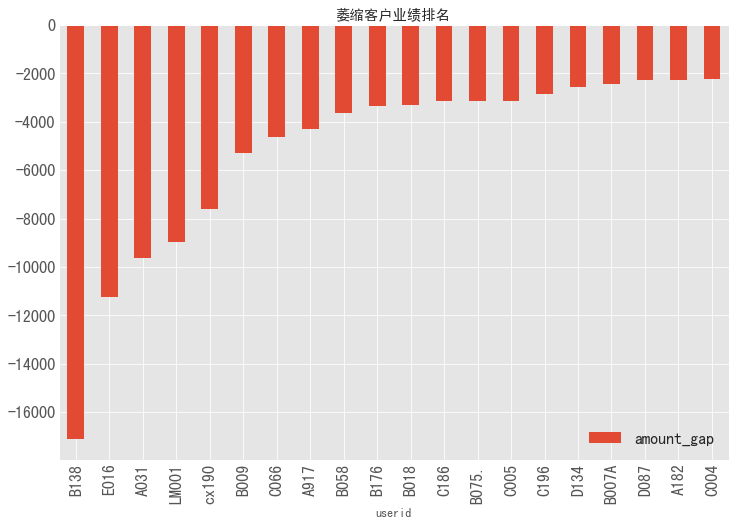

In [238]:
merge_inner[merge_inner[['amount_gap']]<0][['amount_gap']].sort_values(by='amount_gap').head(20).plot.bar(title = '萎缩客户业绩排名')

In [239]:
user_decreased=user_decreased.dropna()

In [240]:
user_decreased_data2016=pd.merge(user_decreased,data2016,on='userid').groupby('month').sum()['order_amount'].reset_index()
user_decreased_data2016

,month,order_amount
0,2016-01-01,23580.136705
1,2016-02-01,24751.522500
2,2016-03-01,41323.106705
3,2016-04-01,48750.531364
4,2016-05-01,68488.865795
5,2016-06-01,46598.377500
6,2016-07-01,35336.072273
7,2016-08-01,31095.001477
8,2016-09-01,30331.056477
9,2016-10-01,32070.962273


In [241]:
user_decreased_data=pd.merge(user_decreased,data,on='userid').groupby('month').sum()['order_amount'].reset_index()
user_decreased_data

,month,order_amount
0,2017-01-01,15497.763409
1,2017-02-01,25129.900909
2,2017-03-01,24316.518636
3,2017-04-01,16831.277386
4,2017-05-01,27254.614886
5,2017-06-01,41884.849432
6,2017-07-01,23497.215568
7,2017-08-01,29213.746591
8,2017-09-01,16242.112955
9,2017-10-01,19057.231136


Text(0.5, 1.0, '萎缩类客户的消费走势图')

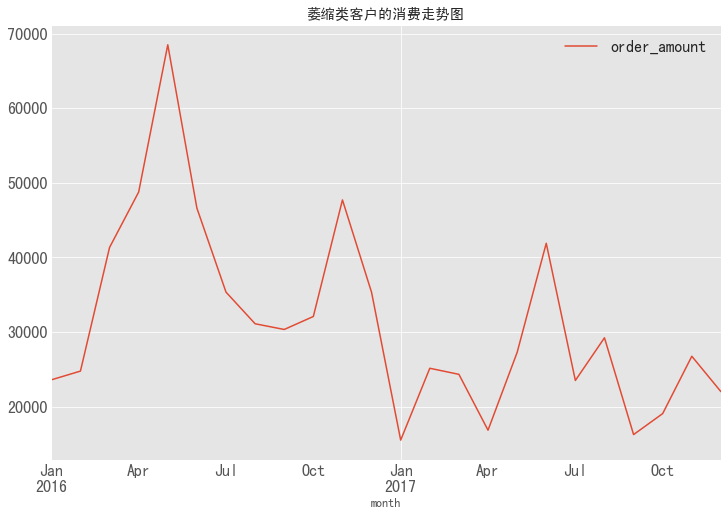

In [242]:
pd.concat([user_decreased_data2016,user_decreased_data],axis=0).groupby('month').sum().plot()
plt.title('萎缩类客户的消费走势图')

<font color=red size=3> 2.4.8  流失类客户分析 </font>

In [245]:
#流失类客户
merge_leftout=pd.merge(user_amount02,user_amount,on='userid',how='left')
merge_leftout.head()

,order_amount_x,order_amount_y
userid,,
00000,0.000000,NaN
008,1473.534545,2113.0
088,22376.212273,26094.0
A-1000,1411.618182,3716.0
A001,2460.547045,1268.0


In [246]:
#流失类客户的数量
merge_leftout[merge_leftout.order_amount_y.isna()]['order_amount_x'].count()

248

In [247]:
#流失类客户的金额
merge_leftout[merge_leftout.order_amount_y.isna()]['order_amount_x'].sum()

128175.85647727273

In [248]:
user_lossed=merge_leftout[merge_leftout.order_amount_y.isna()][['order_amount_x']].sort_values(by='order_amount_x',ascending=False)
user_lossed.head()

,order_amount_x
userid,
C136,20652.551932
C144,7238.403409
W013(爱旺),4926.080455
E110,4556.857955
C105,3388.539545


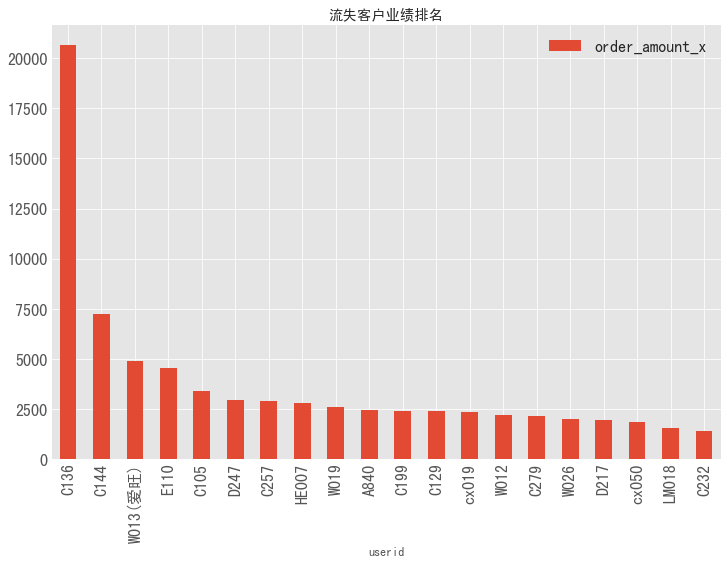

In [249]:
merge_leftout[merge_leftout.order_amount_y.isna()][['order_amount_x']].sort_values(by='order_amount_x',ascending=False).head(20).plot.bar(title = '流失客户业绩排名')

In [250]:
order_date_list=pd.concat([data2016[['userid','order_date']],data[['userid','order_date']]]).sort_values(by='order_date')
order_date_list.head()

,userid,order_date
4439,D015,2016-01-01
4438,D197,2016-01-01
3502,B215,2016-01-01
4437,B165,2016-01-01
4435,D307,2016-01-04


In [251]:
order_date_gap=order_date_list.groupby('userid').apply(lambda x:x-x.shift(1).dropna()).reset_index().dropna()

In [252]:
order_date_gap=order_date_gap[['order_date']].apply(lambda x:x.dt.days)

In [253]:
order_date_gap[order_date_gap>0].dropna().describe()

,order_date
count,4888.000000
mean,54.580606
std,85.560959
min,1.000000
25%,7.000000
50%,23.000000
75%,61.000000
max,642.000000


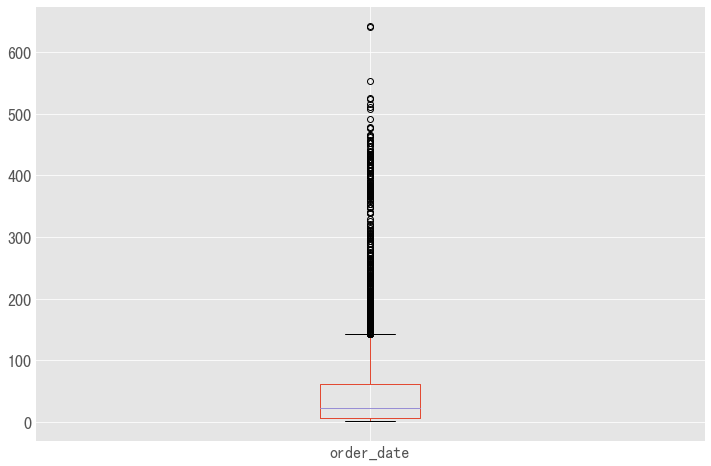

In [254]:
order_date_gap[order_date_gap>0].dropna().plot.box()

<font color=red size=3> 2.4.9  新增类客户分析 </font>

In [255]:
#新增类客户
merge_right=pd.merge(user_amount02,user_amount,on='userid',how='right')
merge_right.head()

,order_amount_x,order_amount_y
userid,,
008,1473.534545,2113
088,22376.212273,26094
A-1000,1411.618182,3716
A001,2460.547045,1268
A003,6637.723182,9111


In [256]:
#新增类客户的数量
merge_right[merge_right.order_amount_x.isna()]['order_amount_y'].count()

243

In [257]:
#新增类客户的金额
merge_right[merge_right.order_amount_x.isna()]['order_amount_y'].sum()

161062

In [258]:
user_new=merge_right[merge_right.order_amount_x.isna()][['order_amount_y']].sort_values(by='order_amount_y',ascending=False)
user_new.head()

,order_amount_y
userid,
B138.,15748
HE016,8830
F007,4980
B244,4290
C295,4285


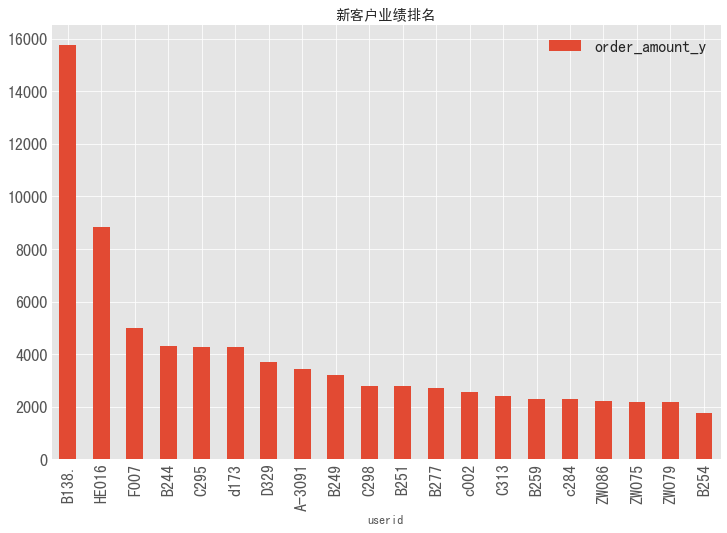

In [259]:
merge_right[merge_right.order_amount_x.isna()][['order_amount_y']].sort_values(by='order_amount_y',ascending=False).head(20).plot.bar(title = '新客户业绩排名')

Text(0.5, 1.0, '各个月度新客户开发数量')

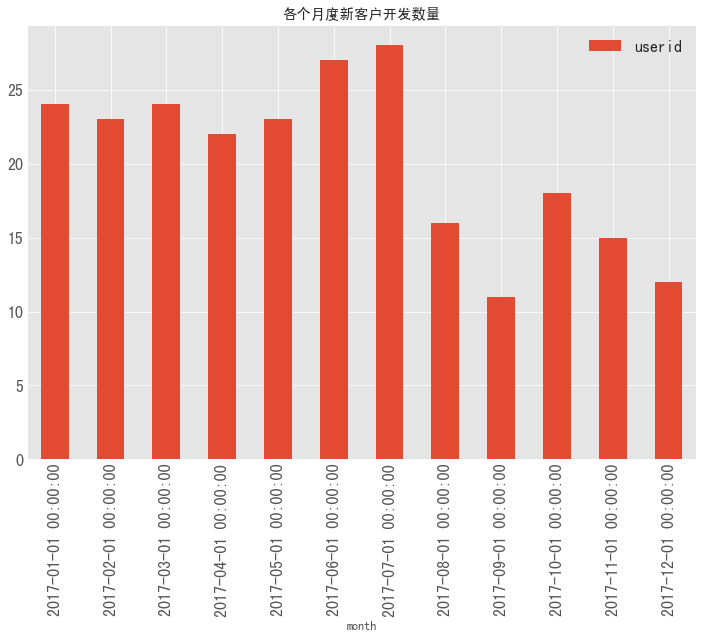

In [260]:
pd.merge(user_new,data,on='userid').groupby('userid').agg({'month':np.min}).reset_index().groupby('month').count().plot.bar()
plt.title('各个月度新客户开发数量')

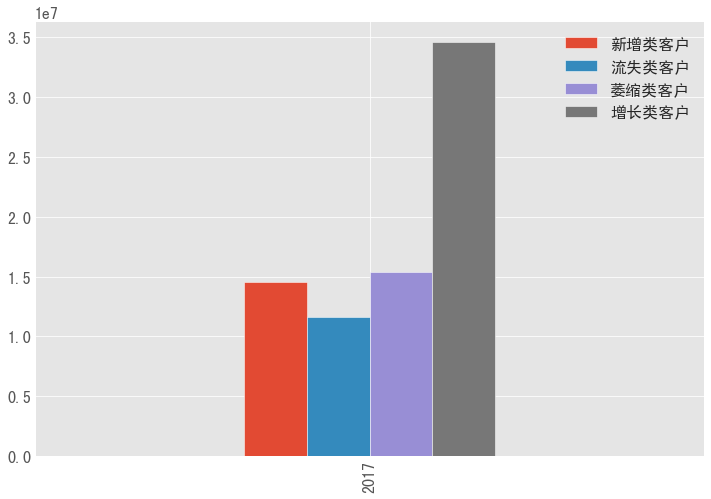

In [273]:

pd.DataFrame({'新增类客户':14523245,
'流失类客户':11636748,
'萎缩类客户':15388776,
'增长类客户':34605441},index=[2017]).plot.bar(width = 0.3,edgecolor = 'white')


<font color=red size=3> 模块三、 RFM模型进行K-means聚类建模 </font>

In [274]:
#RFM模型

In [275]:
order_date_last=pd.concat([data2016[['userid','order_date']],data[['userid','order_date']]]).groupby('userid').agg(np.max)

<font color=red size=3> 3.1   模型准备 </font>

In [276]:
order_date_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 000 to zxs003
Data columns (total 1 columns):
order_date    879 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.7+ KB


In [278]:
order_date_last['today']=pd.to_datetime('2019-05-20')

In [282]:
order_date_last['time_gap']=order_date_last['today']-order_date_last['order_date']

In [285]:
rmf_r=order_date_last[['time_gap']]

In [287]:
rmf_r=rmf_r.apply(lambda x:x.dt.days)

In [288]:
order_amount_sum=pd.concat([data02,data]).groupby('userid').sum()
order_amount_sum.head()

,order_amount
userid,
000,15.000000
00000,0.000000
008,3597.598636
088,48506.099773
A-1000,5136.567955


In [289]:
order_count_sum=pd.concat([data2016,data]).groupby('userid').count()[['orderid']]
order_count_sum.head()

,orderid
userid,
000,2
00000,1
008,40
088,144
A-1000,25


In [290]:
rfm=rmf_r.join(order_count_sum)
rfm=rfm.join(order_amount_sum)
rfm.head()

,time_gap,orderid,order_amount
userid,,,
000,629,2,15.000000
00000,1187,1,0.000000
008,507,40,3597.598636
088,510,144,48506.099773
A-1000,524,25,5136.567955


<font color=red size=3> 3.2   变量归一化 </font>

In [291]:
from sklearn.preprocessing import scale
rfm_scaled=scale(rfm)

In [292]:
rfm_data=pd.DataFrame(rfm_scaled,columns=['R','F','M'])
rfm_data.head()

,R,F,M
0,-0.540707,-0.139066,-0.247486
1,2.082715,-0.152911,-0.248813
2,-1.114287,0.387051,0.069355
3,-1.100182,1.826950,4.041017
4,-1.034362,0.179373,0.205460


<font color=red size=3> 3.3   变量正态性转换 </font>

In [293]:
rfm_data.skew()

R     0.718362
F    20.176336
M    11.592962
dtype: float64

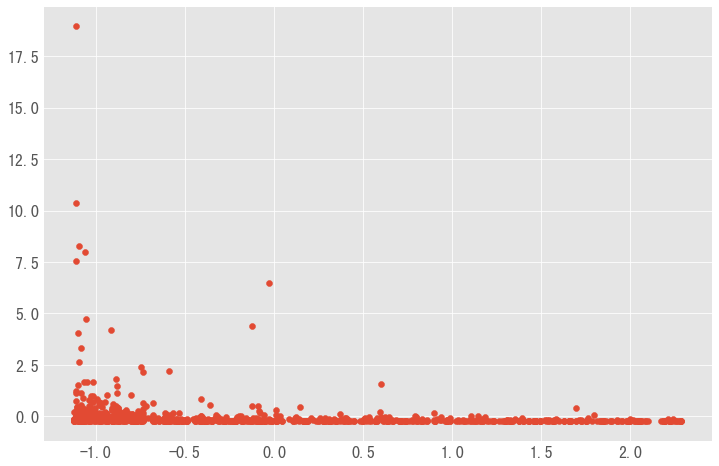

In [294]:
plt.scatter(rfm_data['R'],rfm_data['M'])

<font color=red size=3> 正态评分转换 </font>

In [295]:
from sklearn import preprocessing 
quantile_tranformer=preprocessing.QuantileTransformer(output_distribution='normal',random_state=1234)
rfm_transformed=quantile_tranformer.fit_transform(rfm_data)
rfm_transformed=pd.DataFrame(rfm_transformed,columns=['R','F','M'])
rfm_transformed.head()

,R,F,M
0,-0.218773,-0.217488,-1.657681
1,1.924802,-5.199338,-5.199338
2,-2.144011,1.726361,1.058871
3,-1.710968,2.461481,2.323944
4,-1.152175,1.411293,1.317251


In [296]:
rfm_transformed.skew()

R   -0.688905
F   -0.529978
M   -1.126854
dtype: float64

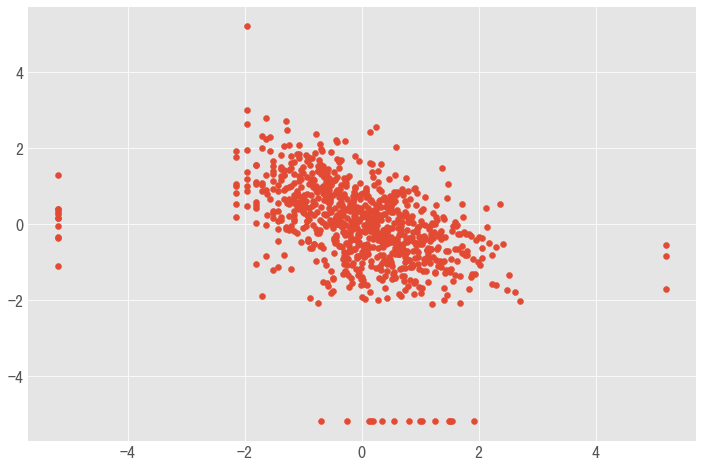

In [297]:
plt.scatter(rfm_transformed['R'],rfm_transformed['M'])

<font color=red size=3> 3.4    KMeans建模 </font>

In [298]:
from sklearn.cluster import KMeans


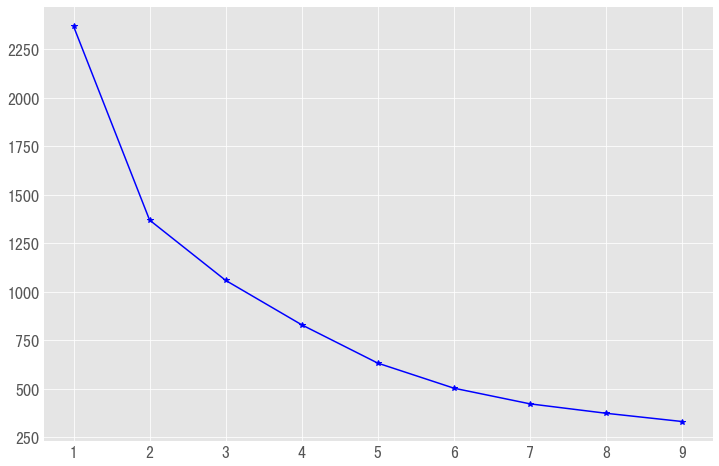

In [299]:
knums=range(1,10)
sse_sum=[]
for knum in knums:
    sse=[]
    kmeans=KMeans(n_clusters=knum,random_state=10)
    kmeans.fit(rfm_transformed[['R','M']])
    labels=kmeans.labels_
    centers=kmeans.cluster_centers_
    for label in set(labels):
        sse.append(np.sum(np.sum((rfm_transformed[['R','M']].loc[labels==label]-centers[label,:])**2)))
    sse_sum.append(np.sum(sse))

plt.plot(knums,sse_sum,'b*-')

In [300]:
kmeans=KMeans(n_clusters=5)
result=kmeans.fit(rfm_transformed[['R','M']])
print(result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [301]:
y_kmeans=kmeans.predict(rfm_transformed[['R','M']])
centroids=kmeans.cluster_centers_

<font color=red size=3> 3.5    模型评估 </font>

<font color=red size=3> 有标准答案的时候用ARI </font>

In [302]:
#from sklearn import metrics
#metrics.adjusted_rand_score(y, result.labels_ )

<font color=red size=3> 整体轮廓系数 </font>

In [303]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [304]:
metrics.silhouette_score(rfm_transformed[['R','M','F']], y_kmeans, metric='euclidean')

0.18147457388422752

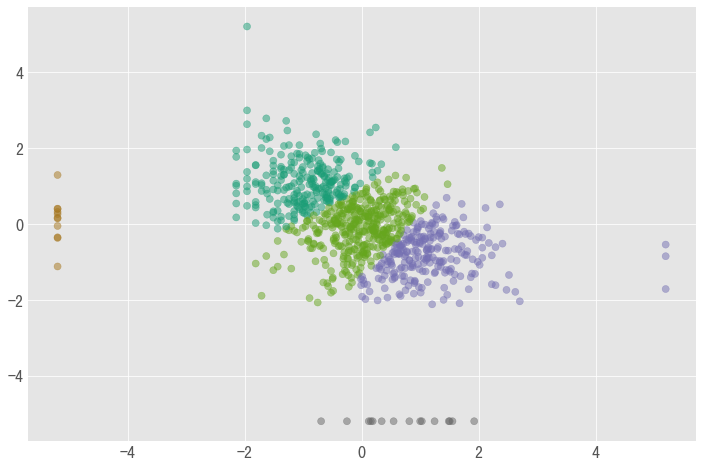

In [305]:
plt.scatter(rfm_transformed['R'],rfm_transformed['M'],c=y_kmeans, cmap='Dark2', s=50, alpha=0.5, marker='o')

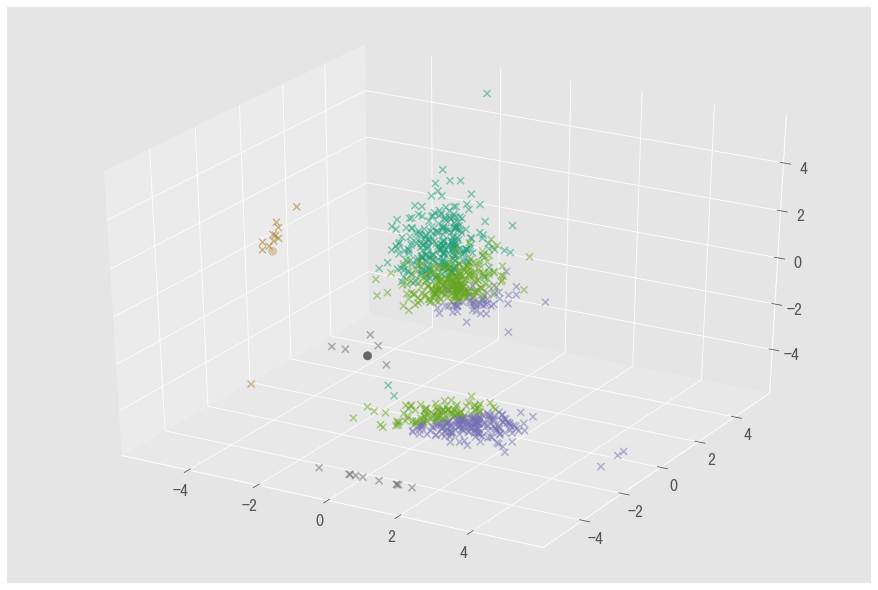

In [306]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
axes3d = Axes3D(fig)


axes3d.scatter(rfm_transformed['R'],rfm_transformed['M'],rfm_transformed['F'],c=y_kmeans, cmap='Dark2', s=50, alpha=0.5, marker='x')
axes3d.scatter(centroids[:,0], centroids[:,1], c=[0,1,2,3,4], cmap='Dark2', s=70,  marker='o')
axes3d.grid()

<font color=red size=3> 3.6    KMeans建模输出 </font>

In [307]:
rfm['labels']=y_kmeans

In [308]:
rfm.sort_values('order_amount',ascending=False)

,time_gap,orderid,order_amount,labels
userid,,,,
A318,508,1827,217095.535909,0
C249,508,786,120232.516023,0
C198,511,380,96634.041023,0
A022,518,548,93230.507841,0
B009,508,220,88290.618068,0
CK001,738,4,76315.636364,0
A031,520,49,56235.665568,0
LM001,718,5,52216.922727,0
B026,549,215,50029.680227,0


<font color=red size=3> 3.7   决策树建模输出 </font>

In [309]:
rfm=rfm.reset_index()

In [312]:
rfm_tree_x=rfm[['time_gap','orderid','order_amount']]
rfm_tree_x.head()

,time_gap,orderid,order_amount
0,629,2,15.000000
1,1187,1,0.000000
2,507,40,3597.598636
3,510,144,48506.099773
4,524,25,5136.567955


In [313]:
rfm_tree_y=rfm[['labels']]

In [314]:
from sklearn.tree import tree

In [315]:
tree_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=200)
tree_model.fit(rfm_tree_x,rfm_tree_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [316]:
import pydotplus
from IPython.display import Image
import sklearn.tree as tree

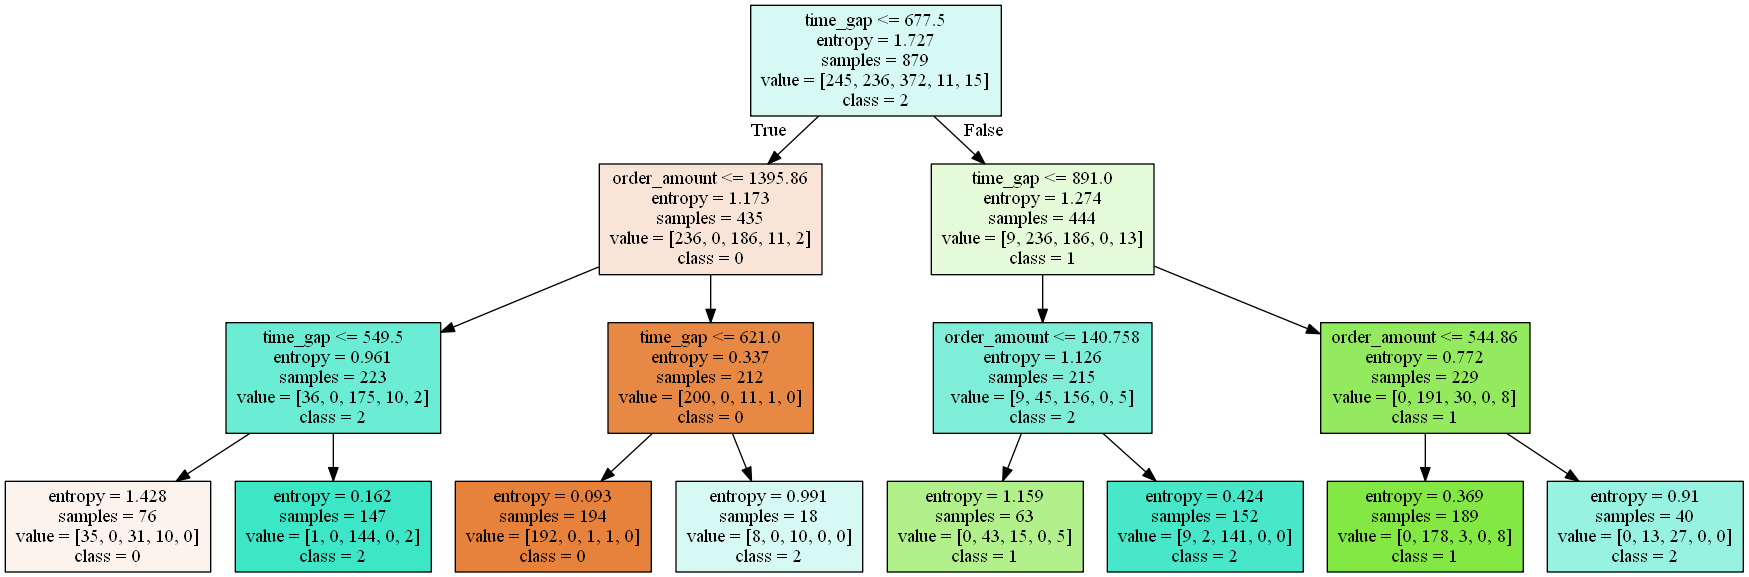

In [317]:
dot_data = tree.export_graphviz(
    tree_model, 
    out_file=None, 
    feature_names=rfm_tree_x.columns,
    max_depth=3,
    class_names=['0','1','2','3','4'],
    filled=True
) 
            
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

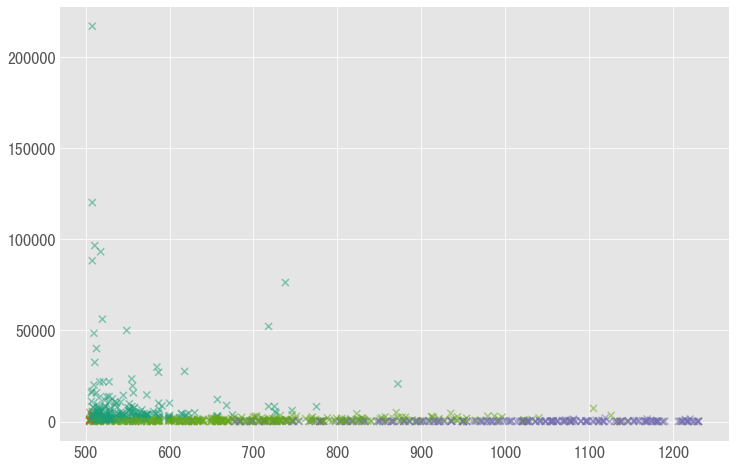

In [319]:
plt.scatter(rfm['time_gap'],rfm['order_amount'],c=y_kmeans, cmap='Dark2', s=50, alpha=0.5, marker='x')